In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
data = pd.read_csv("Mall_Customers.csv")
data = data.iloc[:, 3:5]

In [4]:
def ElbowMethod():
  inertias = []
  for i in range(1,10):
      kmeans = KMeans(n_clusters=i, n_init=10)
      kmeans.fit(data)
      inertias.append(kmeans.inertia_)

  plt.plot(range(1,10), inertias, marker='o')
  plt.title('Elbow method')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()


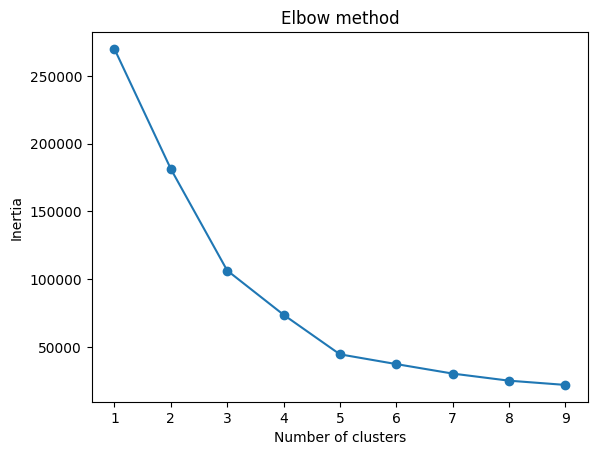

In [5]:
ElbowMethod();

Optimal K is 5 in this case

In [6]:
k = 5

In [7]:
def initiate_centroids(k, data):

    centroids = data.sample(n=k, random_state=42)
    return centroids

In [78]:
def centroid_assign(centroids, data):

  distances = np.zeros((data.shape[0], centroids.shape[0]))
  data=data.to_numpy()
  centroids = centroids.to_numpy()
  for i, data_point in enumerate(data):
    for j, centroid in enumerate(centroids):
      distances[i, j] = np.linalg.norm(data_point - centroid)

  cluster_labels = np.argmin(distances, axis=1)

  return cluster_labels

In [99]:
def update_centroids(data, cluster_labels, k, centroids):
    new_centroids = np.zeros((k, data.shape[1]))
    for cluster in range(k):
        cluster_data = data[cluster_labels == cluster]
        if len(cluster_data) > 0:
            new_centroids[cluster] = np.mean(cluster_data, axis=0)
        else:
            new_centroids[cluster] = centroids.iloc[cluster].to_numpy()

    return pd.DataFrame(new_centroids, columns=data.columns)


def k_means_clustering(data, k, max_iterations=100):
    centroids = initiate_centroids(k, data)

    for iteration in range(max_iterations):
        cluster_labels = centroid_assign(centroids, data)
        new_centroids = update_centroids(data, cluster_labels, k, centroids)


        if np.array_equal(new_centroids.to_numpy(), centroids.to_numpy()):
            break

        centroids = new_centroids

    return cluster_labels, centroids

In [ ]:
cluster_labels, centroids = k_means_clustering(data, k)

In [97]:
def visualize_clusters(data, cluster_labels, centroids):

    plt.figure(figsize=(10, 6))

    sns.scatterplot(x='Annual Income (k$)', y='Spending Score', hue=cluster_labels, data=data, palette='viridis', legend='full', s=70)

    sns.scatterplot(x=centroids.iloc[:, 0], y=centroids.iloc[:, 1], color='red', marker='X', s=200, label='Centroids')

    plt.title('K-Means Clustering')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()


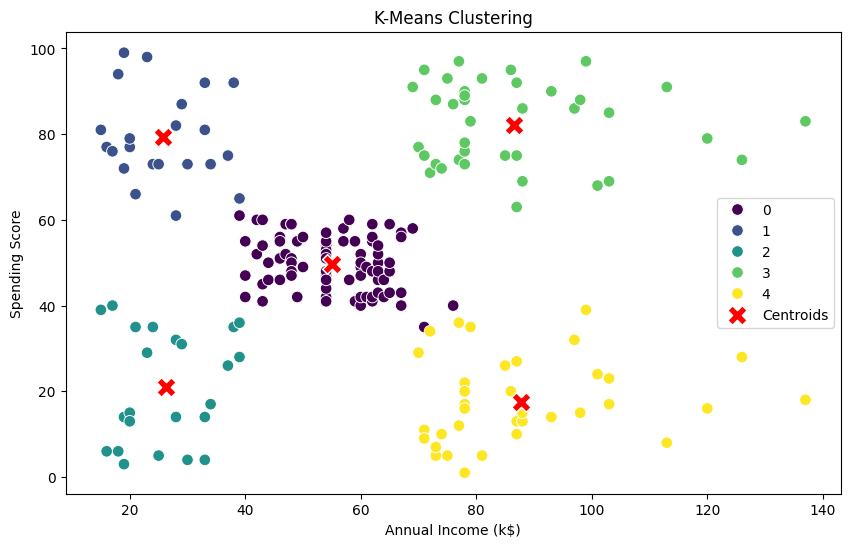

In [98]:
visualize_clusters(data, cluster_labels, centroids)